In [32]:
#========================================#
#            Import Dependencies         #   
#========================================#
import os.path

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
link = 'https://github.com/amarindraa/loan/raw/main/Training%20Data.csv'
df = pd.read_csv(link)

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
df.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


# Data Preprocessing

In [5]:
# A. Menyamakan Style Pada Kolom
df.rename(columns={'CITY':'City','STATE':'State','CURRENT_JOB_YRS':'Current_Job_Yrs','CURRENT_HOUSE_YRS':'Current_House_Yrs'}, inplace=True)

# B. Split Numerical & Categorical
# List of column names containing numerical data
nums = df.select_dtypes(include='number').drop(columns=['Id', 'Risk_Flag'])

# List of column names containing categorical/object data
cats = df.select_dtypes(include='object').columns.tolist()

# C. Append Uttar Pradesh
df['State'] = df['State'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')

# D. Split Risk & Non-Risk

risk0 = df[df['Risk_Flag']==0]
risk1 = df[df['Risk_Flag']==1]



# 1. Data Cleansing

In [43]:
# A. Handling Missing Values
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
City                 0
State                0
Current_Job_Yrs      0
Current_House_Yrs    0
Risk_Flag            0
Job_Duration_cat     0
Experience_cat       0
Income_cat           0
Age_cat              0
dtype: int64

In [7]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
City                 0
State                0
Current_Job_Yrs      0
Current_House_Yrs    0
Risk_Flag            0
dtype: int64

In [8]:
# B. Hanglind Dubplicated Data
df.duplicated().sum()

0

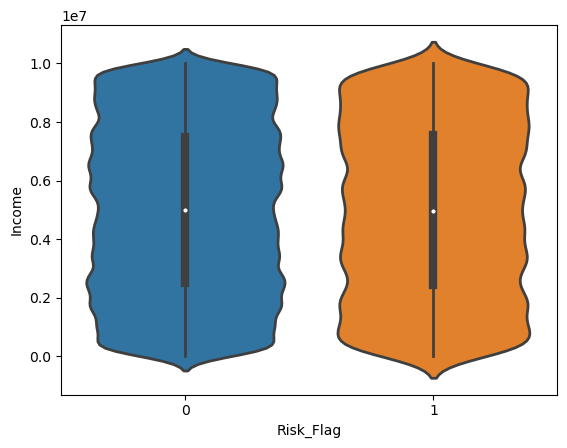

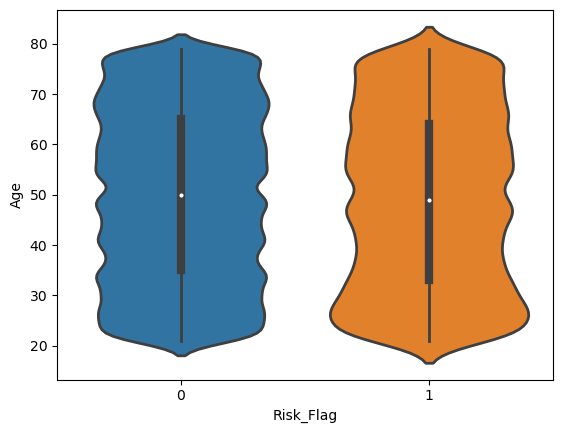

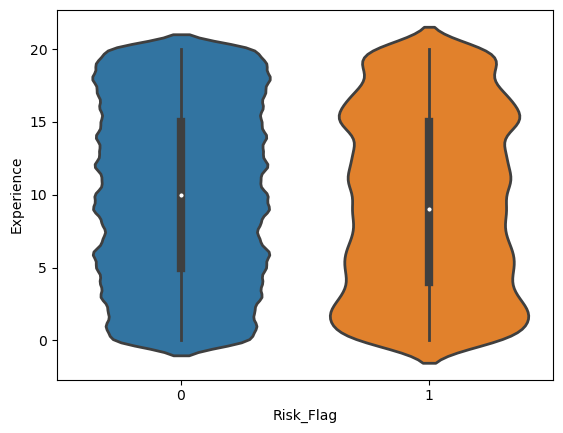

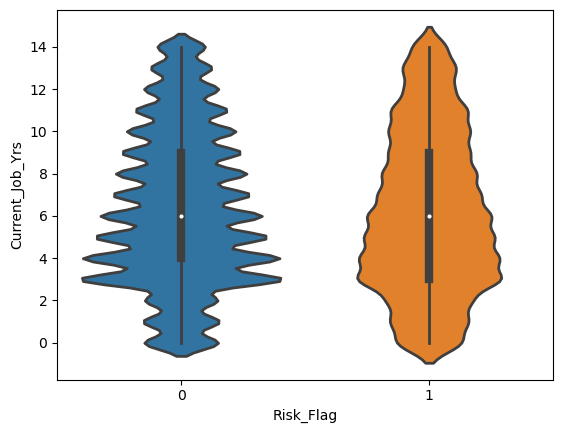

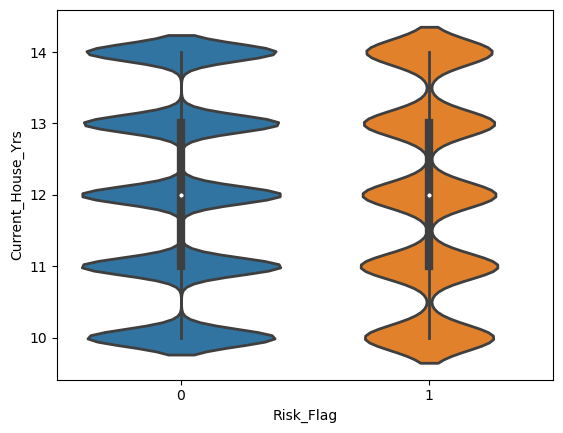

In [27]:
# C. Handling Outliers

for column in nums[::1]:
    sns.violinplot(data=df, y=column, x='Risk_Flag', linewidth=2, orient='v')
    plt.show() 

In [35]:

# D. Feature Transformation / menghandle outlier (z-score, log-transform)
# E. Feature Encoding (One-Hot Encoding, categorical menjadi numerical)
# F. Handle Class Imbalance ( SMOTE )

# tidak dilakukan Feature Transformation, Feature Encoding, Handle Class Imbalance karena akan dilakukan model yang robust terhadap outlier 
# dan melakukan proses scorecard yang umum dipakai dalam dunia Perbankan & Fintech

# 2. Feature Engineering

<Axes: >

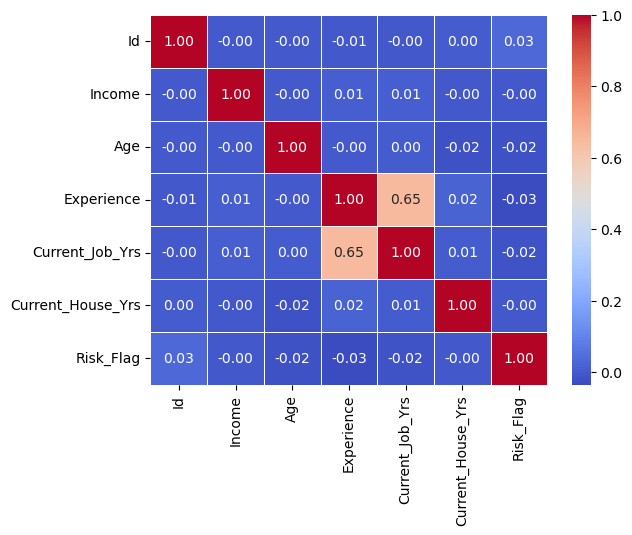

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [41]:
# A. Feature Selection (membuang feature yang kurang relevan atau redundan)

# dalam heatmap dengan target Risk_Flag, fitur Current_House_Yrs & Current_Job_Yrs redundan, namun karena fitur sangat sedikit dan
# predictive model yang digunakan menggunakan scorecard yang memberikan valuasi berbeda dengan sns.heatmap.
# Scorecard adalah alat yang digunakan dalam industri keuangan dan kredit untuk menilai risiko kredit seseorang atau entitas.

In [44]:
# B. Feature extraction (mengurangi feature)
# tidak ada

In [48]:
df['City'].nunique()

317

In [49]:
# C. 4 Feature tambahan :
# Job Duration Categorical
conditions = [
    df['Current_Job_Yrs'] <= 3,
    (df['Current_Job_Yrs'] > 3) & (df['Current_Job_Yrs'] <= 6),
    (df['Current_Job_Yrs'] > 6) & (df['Current_Job_Yrs'] <= 9),
    (df['Current_Job_Yrs'] > 9) & (df['Current_Job_Yrs'] <= 14)
]

choices = ['0-3', '4-6', '7-9', '10-14']

df['Job_Duration_cat'] = np.select(conditions, choices, default='>14')


# Experience Categorical
conditions = [
    df['Experience'] <= 5,
    (df['Experience'] > 5) & (df['Experience'] <= 10),
    (df['Experience'] > 10) & (df['Experience'] <= 15)
]

choices = ['0-5', '6-10', '11-15']

df['Experience_cat'] = np.select(conditions, choices, default='>15')


# Income Categorical
conditions = [
    df['Income'] <= 2500000,
    (df['Income'] > 2500000) & (df['Income'] <= 5000000),
    (df['Income'] > 5000000) & (df['Income'] <= 7500000)
]

choices = ['a.<2,5m', 'b.2,5m - 5m', 'c.5m - 7,5m']

df['Income_cat'] = np.select(conditions, choices, default='d.>7,5m')


# Age Categorical
conditions = [
    df['Age'] <= 35,
    (df['Age'] > 35) & (df['Age'] <= 50),
    (df['Age'] > 50) & (df['Age'] <= 65)
]

choices = ['21-34', '35-49', '50-64']

df['Age_cat'] = np.select(conditions, choices, default='65-79')


# a. Job Duration Categorical
# b. Experience Categorial
# c. Income Categorical
# d. Age Categorical